# Finding, training and evaluating The neural network parameter prediction
This notebook will do the same hyperparameter-search, and the NN will predict: [hA_m2c, hA_m2env, hA_c2a, mda]

In [1]:
from data_and_models import *
import numpy as np
import time
from tensorflow import keras 
import os

In [2]:
chp_air = 1000 
Q_HE = lambda x, u, theta: theta[5]*chp_air*(1-np.exp(-theta[4]/(theta[5]*chp_air)))*(x[1]-u[1])
dTm_dt = lambda x, u, theta: (u[0]-theta[2]*(x[0]-x[1])-theta[3]*(x[0]-u[1]))/theta[0]
dTc_dt = lambda x, u, theta: (theta[2]*(x[0]-x[1])-Q_HE(x,u,theta))/theta[1]

dxdt = lambda x,u,theta: np.array([dTm_dt(x,u,theta), dTc_dt(x,u,theta)])
f_x = lambda x,u,theta: np.array([Q_HE(x,u,theta)])

x0_range = [(20, 60), (20, 60)]
u_range = [(0, 30), (20, 30)]
theta_range = [(100, 800), (40, 400), (5,20), (0.1,1), (1,5), (0.3, 1.2)]

model = dynamical_model(dxdt, f_x)
model.setup(0, 60, 600, 20, x0_range, u_range, theta_range)

data_model = generate_data(model) 
X_NN, y_NN = data_model.load_data("Training_data/X_data.npy", "Training_data/y_data.npy") #could also generate data 
#X_NN, y_NN = data_model.solve_N(2e5, "Training_data/X_data.npy", "Training_data/X_data.npy")

#Move Cm and Cc from y to X: 
X_NN = np.append(X_NN.T, y_NN.T[:2], axis=0).T
y_NN = y_NN[:,2:]

X_train, X_test, y_train, y_test, X_NN_scaled, y_NN_scaled = data_model.prepare_data(X_NN, y_NN)
train_gen = data_model.generator(batch_size=32)

handler = handle_NNs(len(X_train[0,:]), len(y_train[0,:]), data_model)

In [5]:
NN_model = handler.find_opt_hyperparams(X_train[0:20000], X_test[0:20000], y_train[0:20000], y_test[0:20000],
                                        max_epochs=5, project_name="Param_est_case_2")
#NN_model = keras.models.load_model("Best_model")

Epoch 1/2
625/625 - 4s - loss: 0.0973 - accuracy: 0.2571 - val_loss: 0.0838 - val_accuracy: 0.2555
Epoch 2/2
625/625 - 3s - loss: 0.0866 - accuracy: 0.2580 - val_loss: 0.0834 - val_accuracy: 0.2889


Epoch 1/2
625/625 - 3s - loss: 0.0892 - accuracy: 0.2551 - val_loss: 0.0839 - val_accuracy: 0.2808
Epoch 2/2
625/625 - 3s - loss: 0.0848 - accuracy: 0.2648 - val_loss: 0.0827 - val_accuracy: 0.2820


Epoch 1/2
625/625 - 2s - loss: 0.0936 - accuracy: 0.2524 - val_loss: 0.0834 - val_accuracy: 0.2763
Epoch 2/2
625/625 - 2s - loss: 0.0847 - accuracy: 0.2697 - val_loss: 0.0831 - val_accuracy: 0.2848


Epoch 1/2
625/625 - 5s - loss: 0.1826 - accuracy: 0.2485 - val_loss: 0.0999 - val_accuracy: 0.2526
Epoch 2/2
625/625 - 3s - loss: 0.1160 - accuracy: 0.2473 - val_loss: 0.0895 - val_accuracy: 0.2467


Epoch 1/2
625/625 - 2s - loss: 0.0970 - accuracy: 0.2585 - val_loss: 0.0834 - val_accuracy: 0.2621
Epoch 2/2
625/625 - 2s - loss: 0.0852 - accuracy: 0.2559 - val_loss: 0.0831 - val_accuracy: 0.2659


Epoch 3/5
625/625 - 3s - loss: 0.0884 - accuracy: 0.2539 - val_loss: 0.0838 - val_accuracy: 0.2513
Epoch 4/5
625/625 - 3s - loss: 0.0841 - accuracy: 0.2756 - val_loss: 0.0824 - val_accuracy: 0.2977
Epoch 5/5
625/625 - 3s - loss: 0.0825 - accuracy: 0.2903 - val_loss: 0.0811 - val_accuracy: 0.3164


Epoch 3/5
625/625 - 2s - loss: 0.1046 - accuracy: 0.2530 - val_loss: 0.0842 - val_accuracy: 0.2549
Epoch 4/5
625/625 - 1s - loss: 0.0863 - accuracy: 0.2558 - val_loss: 0.0833 - val_accuracy: 0.2680
Epoch 5/5
625/625 - 2s - loss: 0.0846 - accuracy: 0.2549 - val_loss: 0.0831 - val_accuracy: 0.2643


Epoch 1/5
625/625 - 3s - loss: 0.0969 - accuracy: 0.2492 - val_loss: 0.0843 - val_accuracy: 0.2591
Epoch 2/5
625/625 - 3s - loss: 0.0859 - accuracy: 0.2582 - val_loss: 0.0833 - val_accuracy: 0.2708
Epoch 3/5
625/625 - 3s - loss: 0.0845 - accuracy: 0.2598 - val_loss: 0.0829 - val_accuracy: 0.2817
Epoch 4/5
625/625 - 3s - loss: 0.0835 - accuracy: 0.2795 - val_loss: 0.0816 - val_accuracy: 0.3081
Epoch 5/5
625/625 - 3s - loss: 0.0823 - accuracy: 0.3044 - val_loss: 0.0796 - val_accuracy: 0.3426


Epoch 1/5
625/625 - 10s - loss: 0.0897 - accuracy: 0.2521 - val_loss: 0.0836 - val_accuracy: 0.2467
Epoch 2/5
625/625 - 7s - loss: 0.0850 - accuracy: 0.2558 - val_loss: 0.0838 - val_accuracy: 0.2467
Epoch 3/5
625/625 - 8s - loss: 0.0842 - accuracy: 0.2572 - val_loss: 0.0838 - val_accuracy: 0.2810


Epoch 1/5
625/625 - 6s - loss: 0.0926 - accuracy: 0.2515 - val_loss: 0.0833 - val_accuracy: 0.2501
Epoch 2/5
625/625 - 12s - loss: 0.0853 - accuracy: 0.2531 - val_loss: 0.0831 - val_accuracy: 0.2702
Epoch 3/5
625/625 - 13s - loss: 0.0844 - accuracy: 0.2538 - val_loss: 0.0831 - val_accuracy: 0.2510
Epoch 4/5
625/625 - 7s - loss: 0.0837 - accuracy: 0.2689 - val_loss: 0.0836 - val_accuracy: 0.2903


INFO:tensorflow:Oracle triggered exit
Tiden for denne kommandoen var: 2.33 min
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 110)               990       
_________________________________________________________________
Dropout_1 (Dropout)          (None, 110)               0         
_________________________________________________________________
Layer_2 (Dense)              (None, 88)                9768      
_________________________________________________________________
Dropout_2 (Dropout)          (None, 88)                0         
_________________________________________________________________
Layer_3 (Dense)              (None, 67)                5963      
_________________________________________________________________
Dropout_3 (Dropout)          (None, 67)                0         
___________________________________________

In [3]:
#history = NN_model.fit_generator(train_gen, steps_per_epoch=32000//32, epochs=50, 
#                                 validation_data=(X_train[0:1000], y_train[0:1000]), 
#                                 callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])
# history = NN_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, 
#                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

NN_model=keras.models.load_model("Trained_Best_Model_case_2")

INFO:tensorflow:Assets written to: C:\Users\emelf\Documents\USN-Scripts---Emil\Python\Parameter Estimation\Trained_Best_Model_case_2\assets


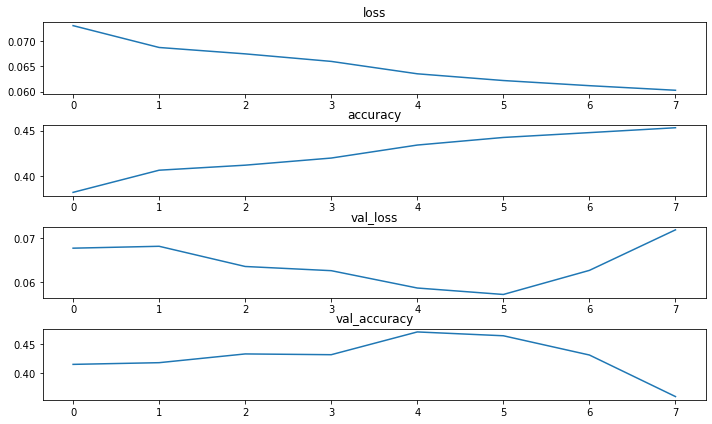

In [7]:
NN_model.save(os.path.abspath("Trained_Best_Model_case_2"))
hist = history.history 
fig, axes = plt.subplots(len(hist), 1)
for el, ax in zip(hist, axes): 
    ax.plot(hist[el])
    ax.set_title(el)
    
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout(h_pad=-0.2)
plt.show()    

In [4]:
from evaluate_NN import TestNN 
test = TestNN(NN_model, model, data_model, n_y=6, y_include=[2,3,4,5])

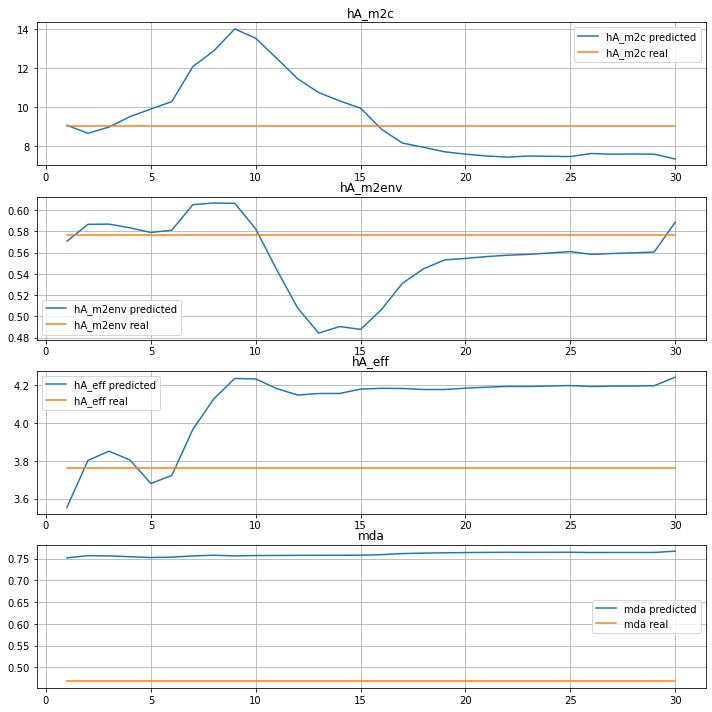

In [5]:
y_NN, y_pred = test.find_theta_one()
fig, axes = plt.subplots(len(y_NN[0]))
names = ["hA_m2c", "hA_m2env", "hA_eff", "mda"]
n_steps = np.linspace(1, len(y_pred), len(y_pred))
for ax, name, th_pred, th_real in zip(axes, names, y_pred.T, y_NN.T):
    ax.set_title(name)
    ax.plot(n_steps, th_pred, label=name+" predicted")
    ax.plot(n_steps, th_real, label=name+" real")
    ax.legend() 
    ax.grid()
    
fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout(h_pad=-0.2)

In [6]:
y_full, theta_data = test.find_theta_N(100)

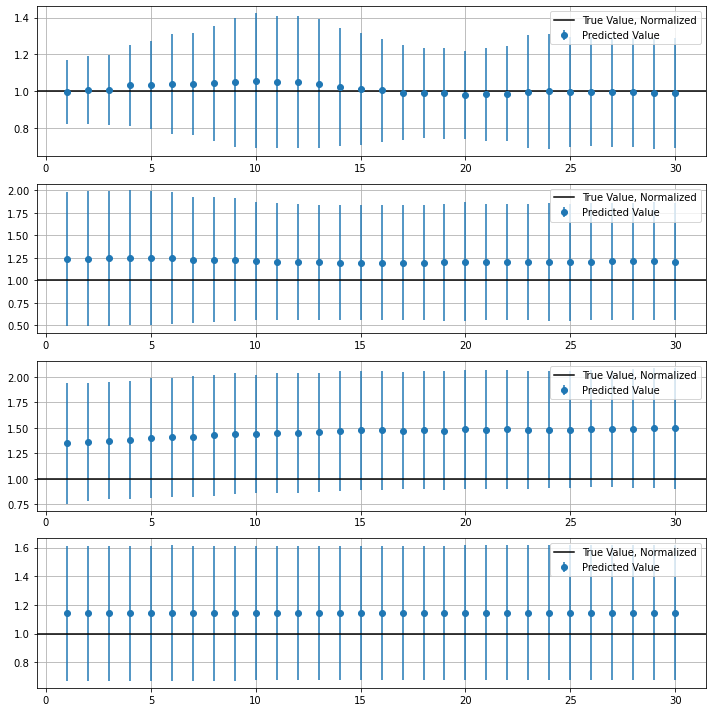

In [8]:
fig, axes = plt.subplots(4,1)
x = np.linspace(1, len(theta_data[0,0,:]), len(theta_data[0,0,:]))
for theta, ax in zip(theta_data, axes): 
    ax.errorbar(x, theta[0], yerr=theta[1], fmt='o', label="Predicted Value")
    ax.axhline(1, color='k', label="True Value, Normalized")
    ax.grid()
    ax.legend()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout()
plt.show()